# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_num=0

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city_num = city_num +1
        cities.append(city)
        print(f"{city_num} {city}")

# Print the city count to confirm sufficient count
len(cities)


1 mataura
2 vaini
3 atuona
4 ushuaia
5 busselton
6 troitskoye
7 kolimvari
8 sankt veit
9 brovst
10 souillac
11 barrow
12 rikitea
13 serebriya
14 yining
15 orodara
16 neiafu
17 yulara
18 tshikapa
19 luderitz
20 punta arenas
21 aktash
22 hofn
23 taolanaro
24 port-gentil
25 hobart
26 grindavik
27 vaxjo
28 kieta
29 vila franca do campo
30 butaritari
31 saint-jean-port-joli
32 illoqqortoormiut
33 ancud
34 jamestown
35 ribeira grande
36 ostrovnoy
37 faya
38 victor harbor
39 torbay
40 albany
41 hilo
42 pitsunda
43 bethel
44 los llanos de aridane
45 new norfolk
46 shieli
47 airai
48 tudela
49 kingston
50 east london
51 ponta do sol
52 emirdag
53 puerto ayora
54 attawapiskat
55 yellowknife
56 skelleftea
57 bam
58 amderma
59 takoradi
60 matara
61 khakhea
62 longyearbyen
63 boa vista
64 mitsamiouli
65 kaitangata
66 nanortalik
67 katsuura
68 talara
69 kamenskoye
70 castro
71 saint-louis
72 san patricio
73 barentsburg
74 chokurdakh
75 altamira
76 lavrentiya
77 maloshuyka
78 great falls
79 esperance

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [25]:

max_temp=[]
city1 = []
cloudiness=[]
lat=[]
lng=[]
country=[]
date=[]
humidity=[]
wind_speed=[]
r= 0
#loop through list of city names
for city in cities:
    
    #get json for current city in list
    test = requests.get(query_url + city).json()
     
    try:
        #build list for desired fields
        city1.append(city)
        max_temp.append(test['main']['temp_max'])
        cloudiness.append(test['clouds']['all'])
        country.append(test['sys']['country'])
        date.append(test['dt'])
        lat.append(test['coord']['lat'])
        lng.append(test['coord']['lon'])
        humidity.append(test['main']['humidity'])
        wind_speed.append(test['wind']['speed'])
    except: 
        city1.remove(city)
       


In [59]:
#create dataframe from list of collected data
weather_df = pd.DataFrame({'City':city1, 
                           'Cloudiness':cloudiness,
                          'Country':country,
                          'Date':date,
                          'Humidity':humidity,
                          'Lat':lat,
                          'Lng':lng,
                          'Max Temp':max_temp,
                          'Wind Speed':wind_speed})

weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100,NZ,1579889587,95,-46.19,168.86,59.00,4.00
1,vaini,20,TO,1579889587,88,-21.20,-175.20,77.00,6.93
2,atuona,43,PF,1579889587,81,-9.80,-139.03,80.01,14.41
3,ushuaia,75,AR,1579889587,54,-54.80,-68.30,55.40,3.06
4,busselton,80,AU,1579889588,52,-33.65,115.33,64.99,11.50
...,...,...,...,...,...,...,...,...,...
570,muisne,75,EC,1579889681,89,0.60,-80.03,84.20,5.82
571,gushikawa,75,JP,1579889681,93,26.35,127.87,69.80,5.82
572,nioro,75,GM,1579889682,12,13.35,-15.75,102.25,8.72
573,roald,75,NO,1579889682,69,62.58,6.13,39.99,19.46


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
#create file containing city info
weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

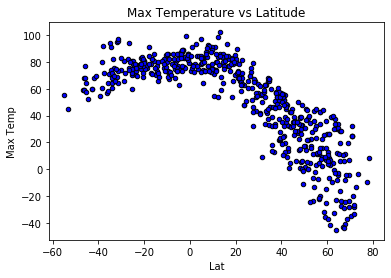

In [28]:
weather_df.plot.scatter(x='Lat', y='Max Temp', c='blue', title='Max Temperature vs Latitude', edgecolor='black')
plt.savefig('maxtemp vs Lat.png')


#### Latitude vs. Humidity Plot

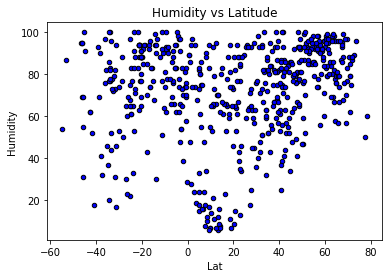

In [29]:
weather_df.plot.scatter(x='Lat', y='Humidity', c='blue', title='Humidity vs Latitude', edgecolor='black')
plt.savefig('Humidity vs Lat.png')

#### Latitude vs. Cloudiness Plot

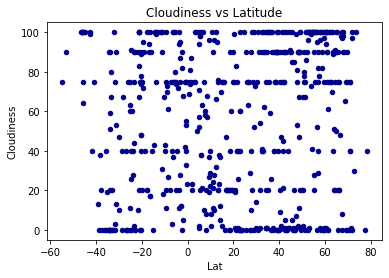

In [30]:
weather_df.plot.scatter(x='Lat', y='Cloudiness', c='Darkblue', title='Cloudiness vs Latitude')
plt.savefig('Cloud vs Lat.png')

#### Latitude vs. Wind Speed Plot

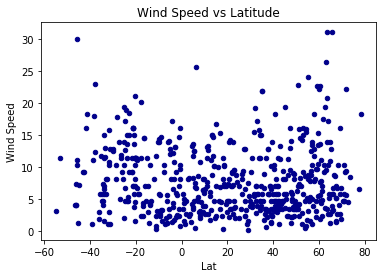

In [31]:
weather_df.plot.scatter(x='Lat', y='Wind Speed', c='Darkblue', title='Wind Speed vs Latitude')
plt.savefig('Wind vs Lat.png')

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
reg = []
def regress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    return (slope, intercept, rvalue, pvalue, stderr)

In [33]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df.loc[weather_df['Lat'] > 0]
south = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

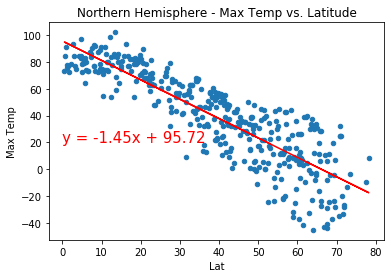

In [44]:
north.plot.scatter(x='Lat', y='Max Temp', title='Northern Hemisphere - Max Temp vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(north['Lat'],north['Max Temp'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.savefig('Nhem MaxTemp vs Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

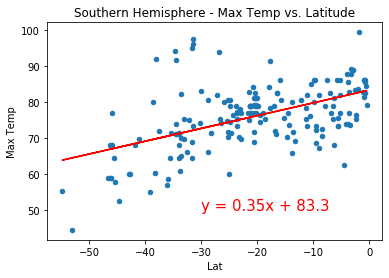

In [53]:
south.plot.scatter(x='Lat', y='Max Temp', title='Southern Hemisphere - Max Temp vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(south['Lat'],south['Max Temp'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.savefig('Shem MaxTemp vs Lat.png')



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Rvalue is 0.4790553061226598


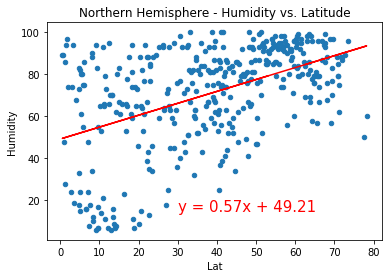

In [64]:
north.plot.scatter(x='Lat', y='Humidity', title='Northern Hemisphere - Humidity vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(north['Lat'],north['Humidity'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(30,15),fontsize=15,color="red")
plt.savefig('Nhem Humidity vs Lat.png')
print(f"Rvalue is {rvalue}")

In [ ]:
#A moderate positive relationship. The higher the latitude the more likely to have higher humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Rvalue is 0.15707733929787634


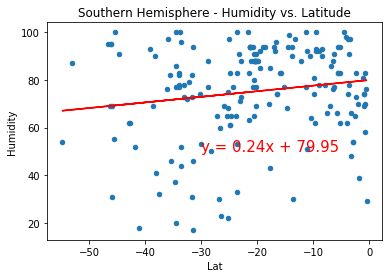

In [65]:
south.plot.scatter(x='Lat', y='Humidity', title='Southern Hemisphere - Humidity vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(south['Lat'],south['Humidity'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.savefig('Shem Humidity vs Lat.png')
print(f"Rvalue is {rvalue}")

In [ ]:
#A very very weak relationship if any. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Rvalue is 0.14949455917376833


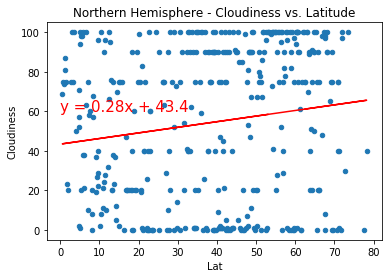

In [66]:
north.plot.scatter(x='Lat', y='Cloudiness', title='Northern Hemisphere - Cloudiness vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(north['Lat'],north['Cloudiness'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.savefig('Nhem Cloudiness vs Lat.png')
print(f"Rvalue is {rvalue}")

In [ ]:
#No Relationship.  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Rvalue is 0.05868833423263224


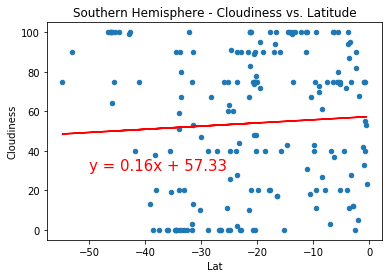

In [67]:
south.plot.scatter(x='Lat', y='Cloudiness', title='Southern Hemisphere - Cloudiness vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(south['Lat'],south['Cloudiness'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.savefig('Shem Humidity vs Lat.png')
print(f"Rvalue is {rvalue}")

In [ ]:
#No relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Rvalue is 0.1339818637357287


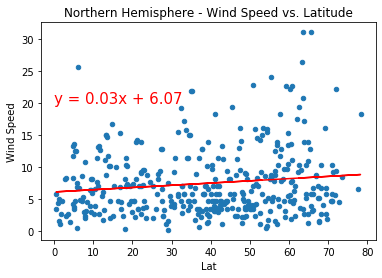

In [68]:
north.plot.scatter(x='Lat', y='Wind Speed', title='Northern Hemisphere - Wind Speed vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(north['Lat'],north['Wind Speed'])
regress_values = north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.savefig('Nhem Wind vs Lat.png')
print(f"Rvalue is {rvalue}")

In [ ]:
#No Relationship

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Rvalue is -0.16773671758491437


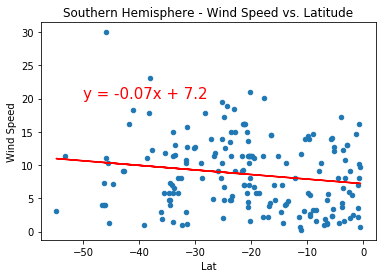

In [69]:
south.plot.scatter(x='Lat', y='Wind Speed', title='Southern Hemisphere - Wind Speed vs. Latitude')
(slope, intercept, rvalue, pvalue, stderr) = regress(south['Lat'],south['Wind Speed'])
regress_values = south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.savefig('Shem Wind vs Lat.png')
print(f"Rvalue is {rvalue}")

In [ ]:
#A very weak negative relationship. 